少数派ゲームで進化ゲームしたとき、選択肢の数とプレイヤーの人数がどのように均衡あるいはカオスを生み出すのか、ちょっと試すやつ

In [49]:
using StatsPlots
using Random

In [41]:
T, N, M = 10^3, 10^3, 10^2    #   観測回数, プレイヤー人数, 選択肢の数

(1000, 1000, 100)

In [42]:
mutable struct Agent
    rates
    profit
    strategy
end
function choice(v, p)
    r = rand()
    s = 0
    for i = 1:size(v)[1]
        s += p[i]
        if r <= s
            return v[i]
        end
    end
end
function one_cycle(agents, strategy_lst, s1_avr_rate_log, sM_avr_rate_log)
    strategy_distribution = ones(M)
    for agent in agents
        s = choice(strategy_lst, agent.rates)
        agent.strategy = s
        strategy_distribution[s] += 1
    end
    strategy_distribution /= N
    strategy_profit = 1 .- strategy_distribution
    strategy_profit -= fill(sum(strategy_profit)/M, M)
    for agent in agents
        agent.profit = strategy_profit[agent.strategy]
        if agent.profit > 0
            agent.rates[agent.strategy] *= 1.1
        else
            agent.rates[agent.strategy] *= 0.9
        end
        agent.rates /= sum(agent.rates)
    end
    s1_avr_sum, sM_avr_sum = 0.0, 0.0
    for agent in agents
        s1_avr_sum += agent.rates[1]
        sM_avr_sum += agent.rates[end]
    end
    push!(s1_avr_rate_log, s1_avr_sum/N)
    push!(sM_avr_rate_log, sM_avr_sum/N)
end

one_cycle (generic function with 2 methods)

In [43]:
agents = [Agent(fill(0.1, M), 0.0, 0) for _ = 1:N]
strategy_lst = [i for i = 1:M]

s1_avr_rate_log, sM_avr_rate_log = [], []

for t = 1:T
    one_cycle(agents, strategy_lst, s1_avr_rate_log, sM_avr_rate_log)
end

In [44]:
for_plot_1, for_plot_M = nothing, nothing
if size(s1_avr_rate_log)[1] > 1000
    for_plot_1 = s1_avr_rate_log[end-10^3:end]
    for_plot_M = sM_avr_rate_log[end-10^3:end]
else
    for_plot_1 = s1_avr_rate_log
    for_plot_M = sM_avr_rate_log
end;

In [45]:
#plot(for_plot, yscale=:log10)

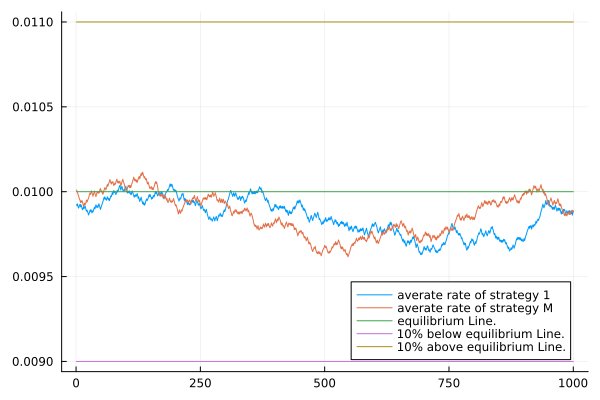

In [46]:
plot(for_plot_1, label="averate rate of strategy 1", legend = :bottomright)
plot!(for_plot_M, label="averate rate of strategy M", legend = :bottomright)
plot!(fill(1/M ,size(for_plot)[1]), label="equilibrium Line.", legend = :bottomright)
plot!(fill(0.9/M ,size(for_plot)[1]), label="10% below equilibrium Line.", legend = :bottomright)
plot!(fill(1.1/M ,size(for_plot)[1]), label="10% above equilibrium Line.", legend = :bottomright)

In [47]:
stability_1 = 0
diff_1 = zeros(min(1000,T) - 1)
for i = 2:min(1000,T)
    stability_1 += abs(for_plot_1[i] - for_plot_1[i-1])/for_plot[i]
    diff_1[i-1] = (for_plot[i] - for_plot[i-1])/for_plot[i]
end
stability_1 /= min(1000,T) - 1
println(stability_1)

0.0010595865996852081


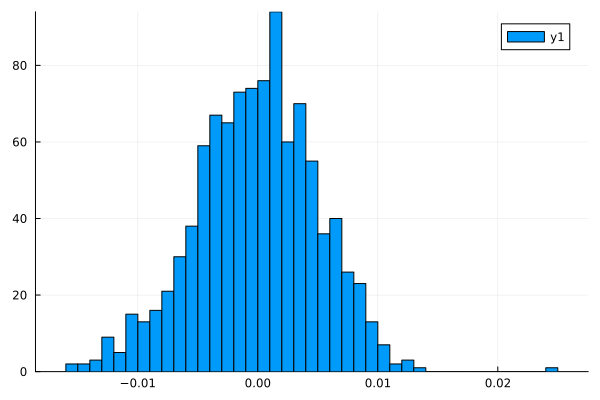

In [48]:
histogram(diff, bins=50)
